<a href="https://colab.research.google.com/github/imdineshkumar24/TENSORGO_PROJECT/blob/main/DINESH_KUMAR_M_21ALR016_TENSORGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TOPIC : LLM FINE-TUNING COMPARISON STUDY**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshkumarm21alr016/yelp-rating1-dataset")
#{"username":"dineshkumarm21alr016","key":"4625c36b8e4f9b218c4d28e0b9bfe723"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dineshkumarm21alr016
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshkumarm21alr016/yelp-rating1-dataset


100%|██████████| 9.85M/9.85M [00:00<00:00, 82.8MB/s]

In [ ]:
import pandas as pd

df=pd.read_csv("/content/yelp-rating1-dataset/yelp_ratings.csv")

In [ ]:
df.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


In [ ]:
df = df.rename(columns={'sentiment': 'rating'})

In [ ]:
df= df.drop(['stars'],axis=1)

In [ ]:
df['rating'] = df['rating'].replace({1: 'good', 0: 'bad'})

In [ ]:
df.head()

,text,rating
0,Total bill for this horrible service? Over $8G...,bad
1,I *adore* Travis at the Hard Rock's new Kelly ...,good
2,I have to say that this office really has it t...,good
3,Went in for a lunch. Steak sandwich was delici...,good
4,Today was my second out of three sessions I ha...,bad


In [ ]:
df.isna().sum()

,0
text,0
rating,0


In [ ]:
df.shape

(44530, 2)

<Axes: xlabel='rating'>

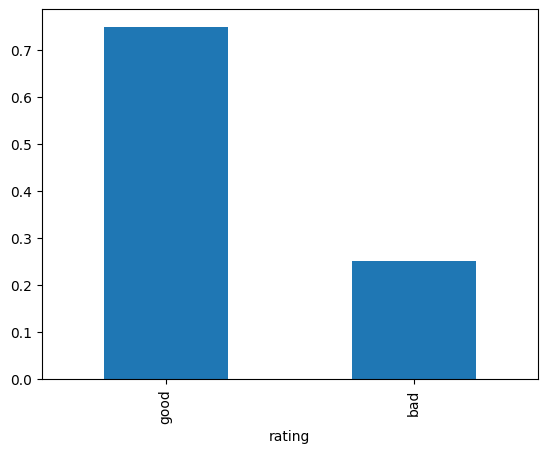

In [ ]:
df['rating'].value_counts(normalize = True).plot.bar()

## **Preprocessing Steps**

In [ ]:
import nltk
nltk.download('all')
text = list(df['text'])
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)
df['text'] = corpus

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
df['rating']=df['rating'].replace({'good': 1, 'bad': 0})

In [ ]:
df.head()

,text,rating
0,total bill horrible service g crook actually n...,0
1,adore travis hard rock new kelly cardenas salo...,1
2,say office really together organized friendly ...,1
3,went lunch steak sandwich delicious caesar sal...,1
4,today second three session paid although first...,0


In [ ]:
X = df['text']
y = df['rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (33397,)
Testing Data :  (11133,)


## **Import BERT-Base-Uncased**

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
import transformers
from transformers import AutoModel, BertTokenizerFast

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text=list(df['text'])

In [ ]:
inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

In [ ]:
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
rating=list(df['rating'])
labels = torch.tensor(rating)

In [ ]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
criterion = CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel

class CustomBertModel(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased", num_labels=2):
        super(CustomBertModel, self).__init__()

        # Load pre-trained BERT model
        self.bert = BertModel.from_pretrained(bert_model_name)

        # Add custom layers on top of BERT
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_labels)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, input_ids, attention_mask):
        # Pass inputs through BERT model
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # Get the [CLS] token's output as the representation
        pooled_output = outputs.pooler_output

        # Pass through custom layers
        x = self.dropout(pooled_output)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)

        return x

# Instantiate the custom model
model = CustomBertModel(num_labels=2)


In [ ]:
for epoch in range(3):
    model.train()

    # Forward pass
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Compute loss
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")